In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (10,6)

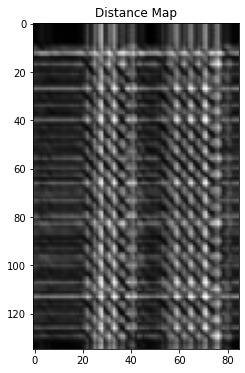

In [8]:
folderpath = "../Motion Graphs Project/data/graphs/graph91/distance/"
filename = "01_02_w40_s20.dist"

df = pd.read_csv(folderpath + filename, names = np.arange(500), sep=" ")
df = df.dropna(axis='columns')
df = df.iloc[: , :-1]

data = df.to_numpy()

plt.imshow( data , cmap = 'Greys_r' , interpolation = None )
plt.title( "Distance Map" )
plt.show()

In [84]:
folderpath = "../Motion Graphs Project/output/"
filename = "graph.txt"

df = pd.read_csv(folderpath + filename, names = np.arange(500), sep=" ")
df = df.dropna(axis='columns', how='all')
df = df.drop(1, axis='columns')
df.set_index(0, inplace = True)

index = 0
animIDs = {}

for U, Vs in df.iterrows():
    if not eval(U)[0] in animIDs:
        animIDs[eval(U)[0]] = index
        index += 1

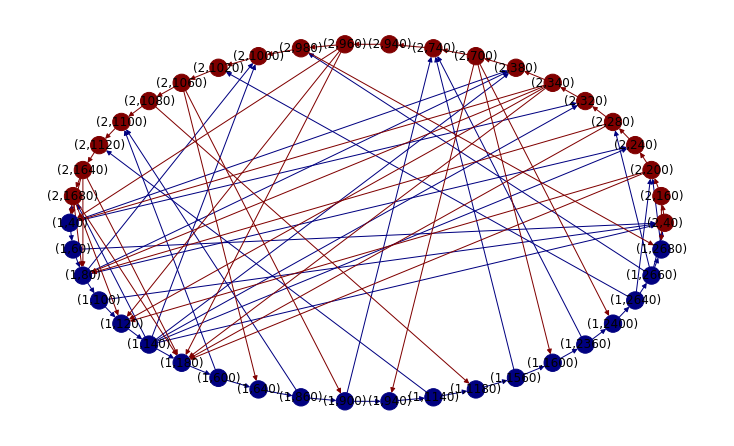

In [103]:
G = nx.DiGraph()

graph_colors = plt.get_cmap('jet')(np.linspace(0, 1.0, len(animIDs)))
node_cmap = []
edge_cmap = []


for U, Vs in df.iterrows():
    G.add_node(U)
    node_cmap.append(graph_colors[animIDs[eval(U)[0]]])

for U, Vs in df.iterrows():
    for V in Vs:
        if not pd.isna(V):
            G.add_edge(U, V)
            edge_cmap.append(graph_colors[animIDs[eval(U)[0]]])

nx.draw_shell(G, node_color=node_cmap, edge_color=edge_cmap, arrows=True, with_labels=True)
plt.show()